In [374]:
import pandas as pd
import numpy as np

In [413]:
data = pd.read_csv('./data/label_2020.csv', engine='python', encoding='cp949')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Columns: 159 entries, Unnamed: 0 to 부실가구
dtypes: float64(39), int64(71), object(49)
memory usage: 11.8+ MB


In [414]:
# 담보대출 용도 및 출처
df_1 = data.iloc[:,52:64]

# 신용대출 용도 및 출처
df_2 = data.iloc[:,75:88]
df_2

# 가구주 직업은 상용근로자 or not, 입주형태는 자가 or not
df_3 = data[['가구주 성별','가구주교육정도 통합별','가구주 혼인상태','입주형태','수도권여부','가구주 직업(대분류)','부실가구']]

df = pd.concat([df_1,df_2,df_3],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출_대출용도_거주주택 구입                    9733 non-null   int64  
 1   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 2   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   int64  
 3   담보대출_대출용도_부채상환                       9733 non-null   int64  
 4   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 5   담보대출_대출용도_생활비 마련                     9733 non-null   int64  
 6   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 7   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 8   담보대출_대출기관_저축은행                       9733 non-null   int64  
 9   담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 10  담보대출_대출기관_보험회사                       9733 non-null   int64  
 11  담보대출_대출기관_기타 기관 등             

In [415]:
# df['HDRI'] = data['HDRI']
# df.drop(['금융부채',''])

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출_대출용도_거주주택 구입                    9733 non-null   int64  
 1   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 2   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   int64  
 3   담보대출_대출용도_부채상환                       9733 non-null   int64  
 4   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 5   담보대출_대출용도_생활비 마련                     9733 non-null   int64  
 6   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 7   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 8   담보대출_대출기관_저축은행                       9733 non-null   int64  
 9   담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 10  담보대출_대출기관_보험회사                       9733 non-null   int64  
 11  담보대출_대출기관_기타 기관 등             

In [417]:
# 가구주직업 인코딩(단순노무 종사자=1, or 0)
for i in range(len(df['가구주 직업(대분류)'])):
    if df['가구주 직업(대분류)'][i]=='단순노무 종사자':
        df['가구주 직업(대분류)'][i]=1
    else:
        df['가구주 직업(대분류)'][i]=0
        
# 입주형태 인코딩(자기집 =1 , or 0)
for i in range(len(df['입주형태'])):
    if df['입주형태'][i]=='자기집':
        df['입주형태'][i]=1
    else:
        df['입주형태'][i]=0
        
# 가구주 혼인상태 인코딩(배우자있음 =1 , or 0)
for i in range(len(df['가구주 혼인상태'])):
    if df['가구주 혼인상태'][i]=='배우자있음':
        df['가구주 혼인상태'][i]=1
    else:
        df['가구주 혼인상태'][i]=0
        
# 가구주교육정도 통합별 인코딩(대학졸업 이상 =1 , or 0)
for i in range(len(df['가구주교육정도 통합별'])):
    if df['가구주교육정도 통합별'][i]=='대학졸업 이상':
        df['가구주교육정도 통합별'][i]=1
    else:
        df['가구주교육정도 통합별'][i]=0

In [405]:
df['수도권여부'].unique()

array(['수도권', '비수도권'], dtype=object)

In [406]:
len(df['가구주 직업(대분류)'])
df['가구주 직업(대분류)']
df['입주형태']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출_대출용도_거주주택 구입                    9733 non-null   int64  
 1   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 2   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   int64  
 3   담보대출_대출용도_부채상환                       9733 non-null   int64  
 4   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 5   담보대출_대출용도_생활비 마련                     9733 non-null   int64  
 6   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 7   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 8   담보대출_대출기관_저축은행                       9733 non-null   int64  
 9   담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 10  담보대출_대출기관_보험회사                       9733 non-null   int64  
 11  담보대출_대출기관_기타 기관 등             

In [418]:
# 나머지 범주형 데이터 인코딩

from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    for j in range(len(df)):
        if type(df[i][j]) == str:
            items = df[i].unique()
            encoder = LabelEncoder()
            encoder.fit(items)
            df[i] = encoder.transform(data[i])

In [388]:
# inf 값 제거
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan) # replace 메서드로 np.inf를 None(np.nan)으로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출_대출용도_거주주택 구입                    9733 non-null   int64  
 1   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 2   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   int64  
 3   담보대출_대출용도_부채상환                       9733 non-null   int64  
 4   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 5   담보대출_대출용도_생활비 마련                     9733 non-null   int64  
 6   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 7   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 8   담보대출_대출기관_저축은행                       9733 non-null   int64  
 9   담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 10  담보대출_대출기관_보험회사                       9733 non-null   int64  
 11  담보대출_대출기관_기타 기관 등             

In [389]:
# 널값 제거(없긴함)

# df = df.dropna(axis=0)
# df.columns

In [419]:
# 연속형 데이터 0과 1사이로 정규화

from sklearn.preprocessing import MinMaxScaler

df2 = df.iloc[:,0:24]   # 연속형 데이터 칼럼들 추출
df2.columns

# MinMaxScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(df2)
df2_scaled = scaler.transform(df2)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df2_scaled = pd.DataFrame(data=df2_scaled, columns=df2.columns)
print('feature들의 최소 값')
print(df2_scaled.min())
print('\nfeature들의 최대 값')
print(df2_scaled.max())

feature들의 최소 값
담보대출_대출용도_거주주택 구입                      0.0
담보대출_대출용도_거주주택이외 부동산 구입                0.0
담보대출_대출용도_전(월)세 보증금 마련                 0.0
담보대출_대출용도_부채상환                         0.0
담보대출_대출용도_사업자금 마련                      0.0
담보대출_대출용도_생활비 마련                       0.0
담보대출_대출용도_기타 용도 등                      0.0
담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)        0.0
담보대출_대출기관_저축은행                         0.0
담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)    0.0
담보대출_대출기관_보험회사                         0.0
담보대출_대출기관_기타 기관 등                      0.0
신용대출                                   0.0
신용대출_대출용도_거주주택 구입                      0.0
신용대출_대출용도_거주주택이외 부동산 구입                0.0
신용대출_대출용도_전(월)세 보증금 마련                 0.0
신용대출_대출용도_부채상환                         0.0
신용대출_대출용도_사업자금 마련                      0.0
신용대출_대출용도_생활비 마련                       0.0
신용대출_대출용도_기타 용도 등                      0.0
신용대출_대출기관_은행(2010년은 농수협 중앙회 제외)        0.0
신용대출_대출기관_저축은행                         0.0
신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)    

In [434]:
df3=df.iloc[:,25:]
df4=pd.concat([df2_scaled,df3],axis=1, join='outer')
df4

,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),...,신용대출_대출기관_저축은행,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가구
0,0.000000,0.0,0.192308,0.00000,0.000000,0.0,0.0,0.017965,0.000000,0.000000,...,0.000000,0.0,0.0,0,1,1,0,1,0,0
1,0.000000,0.0,0.000000,0.00000,0.031667,0.0,0.0,0.017066,0.000000,0.000000,...,0.117647,0.0,0.0,1,1,1,0,1,0,1
2,0.000000,0.0,0.000000,0.03856,0.000000,0.0,0.0,0.000000,0.000000,0.013043,...,0.000000,0.0,0.0,0,0,0,1,0,1,0
3,0.000000,0.0,0.000000,0.00000,0.060000,0.0,0.0,0.000000,0.000000,0.078261,...,0.000000,0.0,0.0,1,1,1,1,0,0,0
4,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9728,0.000000,0.0,0.076923,0.00000,0.000000,0.0,0.0,0.007186,0.000000,0.000000,...,0.000000,0.0,0.0,0,1,1,0,0,0,0
9729,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0,1,1,0,0,0,0
9730,0.196429,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.012575,0.052265,0.000000,...,0.000000,0.0,0.0,0,1,1,1,0,0,0
9731,0.071429,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.014372,0.000000,0.000000,...,0.000000,0.0,0.0,0,1,1,1,0,0,0


In [435]:
df_fin=df4

df_fin

In [439]:
X = df_fin.iloc[:,1:-1]
Y = df_fin.iloc[:,-1]

array([0, 1], dtype=int64)

In [441]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

# 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=11)

In [442]:
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=369)

In [443]:
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [444]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8586
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


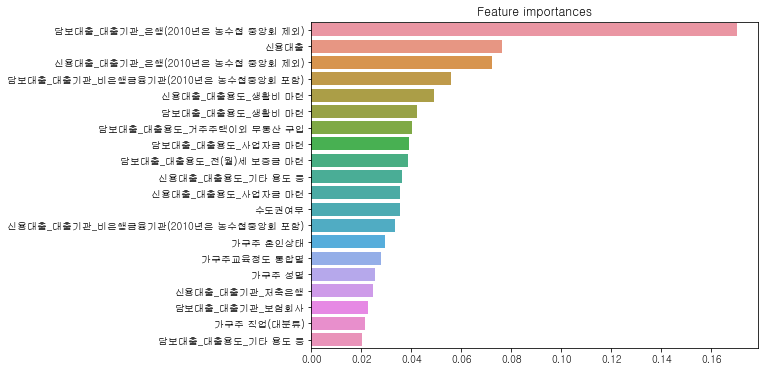

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

- 오버피팅?, 정확도? 모델 잘 설정?

# LightGBM, SMOTE

In [446]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [447]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출_대출용도_거주주택 구입                    9733 non-null   float64
 1   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 2   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   float64
 3   담보대출_대출용도_부채상환                       9733 non-null   float64
 4   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 5   담보대출_대출용도_생활비 마련                     9733 non-null   float64
 6   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 7   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 8   담보대출_대출기관_저축은행                       9733 non-null   float64
 9   담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 10  담보대출_대출기관_보험회사                       9733 non-null   float64
 11  담보대출_대출기관_기타 기관 등             

In [283]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    90.174672
1     9.825328
Name: 부실가구, dtype: float64
테스트 데이터 레이블 값 비율
0    90.806369
1     9.193631
Name: 부실가구, dtype: float64


In [286]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# DecisionTree Classifier 생성
lr_clf = DecisionTreeClassifier(random_state=369)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)


오차 행렬
[[1629  139]
 [ 152   27]]
정확도: 0.8505, 정밀도: 0.1627, 재현율: 0.1508,    F1: 0.1565, AUC:0.5361


In [287]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[1763    5]
 [ 177    2]]
정확도: 0.9065, 정밀도: 0.2857, 재현율: 0.0112,    F1: 0.0215, AUC:0.5042


In [288]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

In [289]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[1707   61]
 [ 167   12]]
정확도: 0.8829, 정밀도: 0.1644, 재현율: 0.0670,    F1: 0.0952, AUC:0.5163


In [298]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

KeyError: 'Amount'

In [297]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [295]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

NameError: name 'get_train_test_dataset' is not defined

# SMOTE

,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가구
0,0,0.0,10000,0,0.0,0,0.0,10000.0,0,0.0,...,0,0,0,0,1,1,0,1,0,0
1,0,0.0,0,0,9500.0,0,0.0,9500.0,0,0.0,...,0,0,0,1,1,1,0,1,0,1
2,0,0.0,0,3000,0.0,0,0.0,0.0,0,3000.0,...,0,0,0,0,0,0,1,0,1,0
3,0,0.0,0,0,18000.0,0,0.0,0.0,0,18000.0,...,0,0,0,1,1,1,1,0,0,0
4,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9728,0,0.0,4000,0,0.0,0,0.0,4000.0,0,0.0,...,0,0,0,0,1,1,0,0,0,0
9729,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,2200,0,1,1,0,0,0,0
9730,22000,0.0,0,0,0.0,0,0.0,7000.0,15000,0.0,...,0,0,0,0,1,1,1,0,0,0
9731,8000,0.0,0,0,0.0,0,0.0,8000.0,0,0.0,...,0,0,0,0,1,1,1,0,0,0
